# CSCI 3022 Homework
<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below. 

In [1]:
NAME = "Tyler Nevell"
COLLABORATORS = "Cody Hegwer, Stephen Kay, Kyle Staub"

If you referenced any web sites or solutions not of your own creation, list those references here:

* List any external references or resources here

---

# Homework 3

In this homework, you'll practice material from the Proability portion of the course, covering
* Discrete and continuous random variables
* Expectation and vaiance
* Joint distributions, covariance and correlation

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats
import math

## Problem #1 - Errors in Speed of Light Meausrement

In this problem, you will model two natural phenomena with probability distributions. In each problem, you will extract parameters from the natural data and construct a random variable based on that data using one of the distributions we've discussed in class. You will then justify why your choice of distribution is appropriate using quantitative and qualitative arguements.

The following data represents the speed of light as indicated by a series of measurements (this is the same data as in Hmwk #2)

In [3]:
l_speed = np.array([  850.,   740.,   900.,  1070.,   930.,   850.,   950.,   980.,
         980.,   880.,  1000.,   980.,   930.,   650.,   760.,   810.,
        1000.,  1000.,   960.,   960.,   960.,   940.,   960.,   940.,
         880.,   800.,   850.,   880.,   900.,   840.,   830.,   790.,
         810.,   880.,   880.,   830.,   800.,   790.,   760.,   800.,
         880.,   880.,   880.,   860.,   720.,   720.,   620.,   860.,
         970.,   950.,   880.,   910.,   850.,   870.,   840.,   840.,
         850.,   840.,   840.,   840.,   890.,   810.,   810.,   820.,
         800.,   770.,   760.,   740.,   750.,   760.,   910.,   920.,
         890.,   860.,   880.,   720.,   840.,   850.,   850.,   780.,
         890.,   840.,   780.,   810.,   760.,   810.,   790.,   810.,
         820.,   850.,   870.,   870.,   810.,   740.,   810.,   940.,
         950.,   800.,   810.,   870.])

The following histogram shows the distribution of data. We've added the `normed=True` flag in order to show the distribution of the data as a density rather than a count.

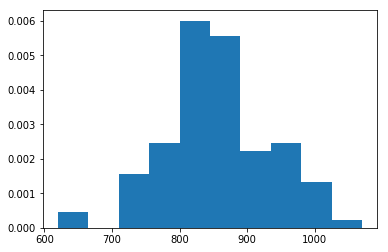

In [4]:
plt.hist(l_speed, normed=True);

### (1a) Construct a random variable that models the speed of light

Your random variable should be named `l_rv` and should be a "frozen" distributions from `stats.scipy`.

In [5]:
l_rv = stats.norm(loc=852, scale=78.6)
l_rv.rvs(size=5)

array([ 879.17558282,  798.33708973,  854.54961868,  767.85839264,
        903.06651273])

### (1b) Compare the distributions using a Quantile-Quantile or Percentile plot

Prepare a QQ-plot (quantile-quantile plot) of the empirical data and your `l_rv` random variate. You should use `np.percentile` to extract the percentile data from your empirical data. You should plot no fewer than 10 points (*e.g.* 0, 0.1, 0.2, .., 0.9, 1.0 - quantiles)

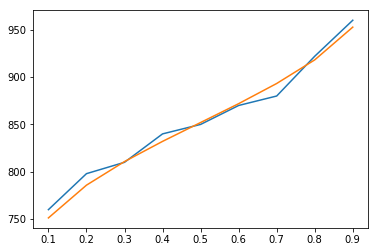

In [6]:
x_axis = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

l_perc = np.percentile(l_speed, x_axis*100)
l_rv_perc = l_rv.ppf(x_axis)

plt.plot(x_axis, l_perc);
plt.plot(x_axis, l_rv_perc);

### (1c) Now, plot the PDF of your RV and overlay the histogram from l_speed

You should see the PDF of your distribution closely matching the histogram of the data. You may need to adjust the parameters of your R.V. to match the distribution closely. It may be important to [read the reference pages](https://docs.scipy.org/doc/scipy/reference/stats.html) concerning the probability distribution you believe this to be.

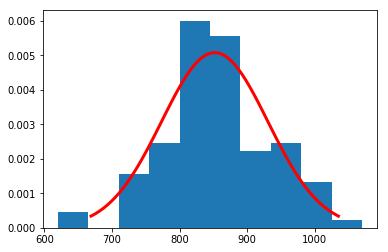

In [7]:
plt.hist(l_speed, normed=True);

fr_x = np.linspace(l_rv.ppf(0.01), l_rv.ppf(0.99), 100)

plt.plot(fr_x, l_rv.pdf(fr_x), 'r-', lw=3);

### (1d) Explain why a Q-Q plot *and* a PDF plot are useful

In the above process, we asked you to prepare a quantile-quantile plot and a second plot that overlays the empirical data and your estimated distribution of the data.

Explain why both are useful and why the second would be necessary to determine if you have the proper distribution even if the QQ-plot indicates you have the correct distribution.

Our QQ plot is useful so we can have a quick look at the distribution for our dataset and see if it matches our assumptions. Our PDF is just further proof that our data is represented well and that our assumptions have more basis. 

# Problem 2 - Radioactive decay

The following data records radioactive decay. The vector `g_counts` contains counts from a Geiger counter device at the corresponding times indicated by `g_time`.

In [8]:
g_time = np.array([0, 1, 2, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30])
g_counts = np.array([126.6, 101.8, 71.6, 101.6, 68.1, 62.9, 45.5, 41.9, 46.3, 34.1, 38.2, 41.7, 24.7, 41.5, 36.6, 19.6,22.8, 29.6, 23.5, 15.3, 13.4, 26.8, 9.8, 18.8, 25.9, 19.3])

The following plot shows the decline in geiger counts over time.

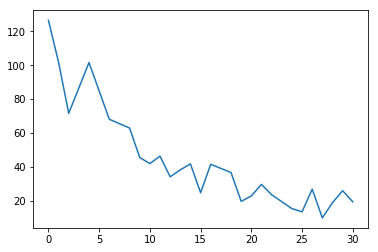

In [9]:
plt.plot(g_time, g_counts);

### (2a) - Construct a random variable that models the geiger counts

Define a variable `g_rv` that is a "frozen" representation of a probability distribution that models `g_counts(time)`. You must choose one of the distributions discussed in the text book and fit the parameter(s) of that distribution to the data.

In [10]:
# your code here
g_mu = np.mean(g_counts)
g_rv = scipy.stats.expon(loc=0, scale=g_mu)

### (2b) - Construct a quantile-quantile plot 

Prepare a QQ-plot (quantile-quantile plot) of the empirical data and your `g_rv` random variate. You should use `np.percentile` to extract the percentile data from your empirical data. You should plot no fewer than 10 points (*e.g.* 0, 0.1, 0.2, .., 0.9, 1.0 - quantiles)

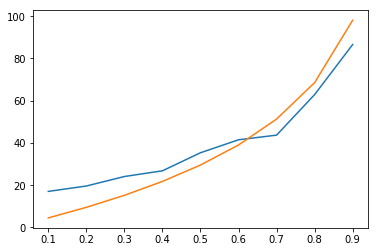

In [11]:
x_axis2 = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

g_perc = np.percentile(g_counts, x_axis2*100)
g_rv_perc =g_rv.ppf(x_axis)

plt.plot(x_axis2, g_perc);
plt.plot(x_axis2, g_rv_perc);

### (2c) Now, plot the PDF of your RV and overlay the histogram from g_count

You should see the PDF of your distribution closely matching the histogram of the data. You may need to adjust the parameters of your R.V. to match the distribution closely. It may be important to [read the reference pages](https://docs.scipy.org/doc/scipy/reference/stats.html) concerning the probability distribution you believe this to be.

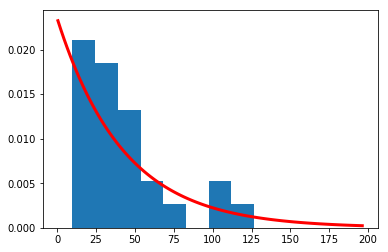

In [12]:
# your code here
plt.hist(g_counts, normed=True, bins = 8);

g_x = np.linspace(g_rv.ppf(0.01), g_rv.ppf(0.99), 100)

plt.plot(g_x, g_rv.pdf(g_x), 'r-', lw=3);

# Problem #3 - Modeling Digits

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
[Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law)  provides empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

You are given the vector `d_x` below that defines the `x` above.

In [13]:
d_x = np.arange(9)+1

### (3a) Define a vector `d_y` defining f(x)

Define a vector `d_y` that is the output of the function $f(x)$ described above. If different logarithm bases are a distant memory, you may [want to refresh your memory](https://math.stackexchange.com/questions/107574/from-natural-log-to-log-base-10) about base changes.

In [14]:
d_y = scipy.log10(d_x+1) - scipy.log10(d_x)
print(d_y)

[ 0.30103     0.17609126  0.12493874  0.09691001  0.07918125  0.06694679
  0.05799195  0.05115252  0.04575749]


In [15]:
assert len(d_y) == 9

### (3b) Probability Distribution

Argue that $f(x)$ defines a proper proability distribution. You should ground your argument in the properties of probability distributions mentioned in class and in the textbook.



f(x) demonstrates that a proper probability distribution has probabilities for all possible outcomes within its domain and probalities of 0 everywhere outside its domain. Additionally,the probabilities sum to 1, which indicates all outcomes fall within the function.

### (3c) Is there tax fraud?


The data in `tax_data.txt` contains the taxable income for individuals in 1978. Use Pandas and probability distribution above to determine whether or not the dataset is likely fraudulent.

You will need to read in tax data from a text file, [extract the leading digit of each non-zero tax payment](https://www.sitepoint.com/community/t/logarithm-to-get-the-first-digit-of-a-number/206396) and then determine if that data is likely fraudulent.

Your first step will be to plot the distribution of digits in the data file *vs.* the theoretical distribution.

you will need [convert NumPy data to integers](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html) to make this work. The data is a tab-seperated file; we've provided the commands to read in that data and convert it to integers.

In [16]:
d_pd = pd.read_csv('tax_data.txt',sep='\t')
d_taxes = d_pd['Tax Incomes'].astype(int)
d_taxes.head()

1    5601
2    4977
3    5959
4    6267
5    5221
Name: Tax Incomes, dtype: int32

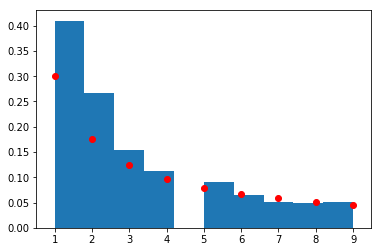

In [17]:
import math
def get_first(value):
    try:
        return (value // 10 ** int(scipy.log10(value)))
    except:
        return 0
    
d_taxes['f'] = d_taxes.apply(lambda x: get_first(x))
dff = d_taxes['f'].loc[d_taxes['f'] > 0]
plt.hist(dff, normed=True);
plt.scatter(d_x, d_y, c='r', zorder=2);

### (3d) Argue whether fraud is likely or not.

Based on your data analysis, indicate if fraud is likely or not.

Because it follows the pattern of a PDF it is most likely not fraud. If it it followed a uniform distribution, we could infer that it may be fraud.

# Problem #4 - Joint Random Variables

In this problem we will construction a *joint distribution* from the titantic data that attempts to capture the probability of survival as functions of the passenger class and sex of the passengers.

In [18]:
ti = pd.read_csv('https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv')

## (4a)

You should produce a Pandas DataFrame named `ti_jrv` ("titanic joint randon variable) similar to the fragment shown below:

| Index	| Pclass |	Sex	| Prob |
|---------------------------- |
|0 |	1 |	1	| 0.131579 |
|1 |	2 |	2	| 0.204678 |

Your table should include the product of passenger class (1,2,3) and Sex (1, 2). The rows can be in any order.

The first row in this example can be interpreted that 13.15% of the male passengers in first class survived while 20.5% of the female passengers in second class survived. 

Your table will contain a total of 6 rows. You can either construct the table in columns and then create the DataFrame or create an empty DataFrame and then [add rows to the frame](https://stackoverflow.com/questions/17091769/python-pandas-fill-a-dataframe-row-by-row) using `loc` or a method of your choosing.

In [19]:
ti_jrv = pd.DataFrame(columns = ['Pclass', 'Sex', 'Prob'])

ti_tot_surv = ti.Survived.sum()

ti_jrv.loc[0] = [1,1,ti [ (ti.Sex == "male")&(ti.Pclass == 1) ].Survived.sum()/ti_tot_surv]
ti_jrv.loc[1] = [2,1,ti [ (ti.Sex == "male")&(ti.Pclass == 2) ].Survived.sum()/ti_tot_surv]
ti_jrv.loc[2] = [3,1,ti [ (ti.Sex == "male")&(ti.Pclass == 3) ].Survived.sum()/ti_tot_surv]

ti_jrv.loc[3] = [1,2,ti [ (ti.Sex == "female")&(ti.Pclass == 1) ].Survived.sum()/ti_tot_surv]
ti_jrv.loc[4] = [2,2,ti [ (ti.Sex == "female")&(ti.Pclass == 2) ].Survived.sum()/ti_tot_surv]
ti_jrv.loc[5] = [3,2,ti [ (ti.Sex == "female")&(ti.Pclass == 3) ].Survived.sum()/ti_tot_surv]

print(ti_jrv)

   Pclass  Sex      Prob
0     1.0  1.0  0.131579
1     2.0  1.0  0.049708
2     3.0  1.0  0.137427
3     1.0  2.0  0.266082
4     2.0  2.0  0.204678
5     3.0  2.0  0.210526


### (4b) Argue that this is isn't a valid probability distribution

Argue that this is or isn't a valid probability distribution over the product space of `Pclass * Sex`.

Because all the probabilities sum to 1 or more, we can infer that this is a valid probability distribution. 

### (4c)  "Marginalize" the probability distribution to compute the survival probability by Sex alone

Using the definition of marginalization, indicate the probability distribution of survival by Sex alone. 

You should assign your results to the variable `ti_sx` and print out your results.

In [20]:
ti_sx = ti_jrv.groupby(['Sex']).Prob.sum()

#ti_sx = np.array([])
#ti_sx.appen

print(ti_sx)

Sex
1.0    0.318713
2.0    0.681287
Name: Prob, dtype: float64


### (4d) Computed the expectation of the survival over the the Sex R.V.

Assign your answer to the variable `ti_sx_e`

In [21]:
#ti_sx_e = 0
#for i in range(2):
    #ti_sx_e = ti_sx_e + ti_sx.loc(['Sex'])[i] * ti_sx.loc(['Prob'])[i]

ti_sx_e = np.sum(ti_sx * np.array([1,2]))

print(ti_sx_e)

1.6812865497076024


### (4e) Marganlize the probability to compute survival probability for Pclass alone

Using the definition of marginalization, indicate the probability distribution of survival by Pclass alone. 

You should assign your results to the variable `ti_cl` and print out your results.

In [22]:
ti_cl = ti_jrv.groupby(['Pclass']).Prob.sum()
print(ti_cl)

Pclass
1.0    0.397661
2.0    0.254386
3.0    0.347953
Name: Prob, dtype: float64


### (4f) Compute the expectation of survival over the Pclass R.V.

Assign your answer to the variable `ti_cl_e`

In [23]:
ti_cl_e = np.sum(ti_cl * np.array([1,2,3]))
print(ti_cl_e)

1.9502923976608186


### (4g) Compute the joint expectation of survival E[Sex Pclass]

Assign your answer to the variable `ti_jrv_e`

In [24]:
ti_jrv_e = np.sum(ti_jrv.Prob * ti_jrv.Sex * ti_jrv.Pclass)
print(ti_jrv_e)

3.257309941520468


### (4h) Compute the Covariance

Compute the covariance of the Sex Pclass joint distribution. Assign the value to `ti_jrv_cov` and print out the value. You can use any method discussed in Chapter 10.2 to compute the covariance although some will be easier than others.

In [25]:
ti_jrv_cov = np.sum(ti_jrv_e - (ti_cl_e * ti_sx_e))
print(ti_jrv_cov)

-0.0216904346637


### (4i) Argue that R.V.'s Sex and PClass are or are not independent. 

Based on the computations above, argue in words why you do or do not believe that the surival rate distributed by Sex and PClass are independent. Use quantitative arguments if possible.

Since Covariance is so close to 0, it is most likely the case that these variables are independent.

### (4j) Calculate the correlation coefficient of the Sex and PClass variables.

You should assign the final value to variable `ti_jrv_cor`

In [26]:
ti_sx_var = np.sum(((ti_sx * np.array([1,2])) - ti_sx_e)**2)

ti_cl_var = np.sum(((ti_cl * np.array([1,2,3])) - ti_cl_e)**2)

ti_jrv_cor = ti_jrv_cov / np.sqrt(ti_sx_var*ti_cl_var)
print(ti_jrv_cor)

-0.00672641073608


### (4k) Are the survival probabilities between Sex and PClass correlated?

Use the data from the joint probability distribution to argue why your correlation coefficient makes sense. You can also use the probability distribution of the marginal R.V.'s (i.e. just Sex or just PClass) to motivate your argument, but you must eventually explain why the *joint* distribution has the correlation coefficient you've calculated.

Because we have a very small correlation co-efficient that is really close to 0, we can infer that there is likely no correlation between Sex and Pclass for survival probability. 